## **COMPARING CLUSTERING ALGORITHMS**
##### 1. K-Means
##### 2. DBSCAN
##### 3. HIERARCHIAL 
### Learning about there *strength* and *weaknesses*

| **Aspect**   | **K-Means** | **Hierarchical Clustering** | **DBSCAN** |
| -------- | ------- | ----------------------- | ------ | 
| **Type of Algorithm**  | Centroid-based clustering    |Connectivity-based clustering | Density-based clustering |               
| **Strengths** | Simple and fast for large datasets.Works well with spherical clusters. Scalable to large datasets.     | Produces a dendrogram for visualization. Does not require specifying the number of clusters initially. Can capture nested clusters.| Can find arbitrarily shaped clusters. Handles noise and outliers well. Does not require specifying the number of clusters.        |               
| **Weaknesses**    | Requires pre-specifying the number of clusters (k). Sensitive to initial centroids. Struggles with non-spherical clusters.|  Computationally expensive for large datasets. Sensitive to noise and outliers. Once a split or merge is done, it cannot be undone.| Struggles with varying densities. Sensitive to parameters (eps and minPts). Not suitable for high-dimensional data.        |  
| **Scalability**   | High (scales well with large datasets) | Low (computationally expensive for large datasets) | Moderate (struggles with very large datasets)
| **Noise Handling** | Poor (noise points can distort centroids) | Poor (noise points can affect the hierarchy) | Excellent (explicitly identifies noise) |
| **Use Cases** | Large datasets. Spherical clusters. Predefined number of clusters. |   Small datasets. Hierarchical relationships. Nested clusters. | Anomaly detection. Clustering with noise. Arbitrary-shaped clusters.|     

# *Dataset*

In [2]:
# Importing iris dataset
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris = datasets.load_iris()
iris.data
y=np.random.randint(range(1,5)  , size=(150,1))

In [3]:
X=pd.DataFrame(iris.data , columns=iris.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# Now we will reduce this 4-Dimensinal(as we have 4 features) TO 2-Dimensional so that we can see the clusters
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [5]:
# Scaling down values so that model treat each points equally important
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X = scaling.fit_transform(X)
X

array([[-1.30971087,  0.65054141],
       [-1.32435711, -0.36051227],
       [-1.40967409, -0.29522986],
       [-1.33958163, -0.64830449],
       [-1.33146886,  0.66552653],
       [-1.11293846,  1.50992585],
       [-1.37627274, -0.18221302],
       [-1.28141939,  0.33277896],
       [-1.4084016 , -1.17789289],
       [-1.30416299, -0.23173293],
       [-1.22325714,  1.3138624 ],
       [-1.2748859 ,  0.03000162],
       [-1.35947347, -0.47887104],
       [-1.57304515, -1.04159745],
       [-1.29049784,  2.40088235],
       [-1.16426043,  2.72533645],
       [-1.28014238,  1.65117453],
       [-1.29222826,  0.6351676 ],
       [-1.07339558,  1.7777797 ],
       [-1.26280003,  1.04600854],
       [-1.12728243,  0.79708495],
       [-1.24119316,  0.88191703],
       [-1.56920777,  0.27184488],
       [-1.12361159,  0.20104806],
       [-1.14948296, -0.07593489],
       [-1.2231214 , -0.29740403],
       [-1.20465318,  0.26671917],
       [-1.25027614,  0.74896183],
       [-1.28795287,

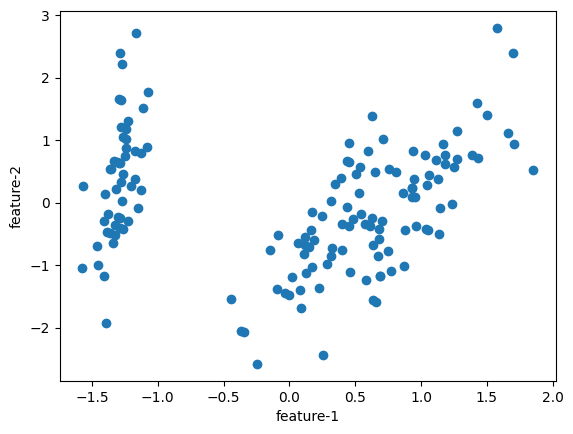

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel("feature-1")
plt.ylabel("feature-2")
plt.show()

In [7]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# *K-Mean*

In [8]:
from sklearn.cluster import KMeans

# Finding the value of K by Elbow Method
wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k , init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

from kneed import KneeLocator
kl =KneeLocator(range(1,11),wcss , curve='convex' , direction='decreasing')

# k1 is the optimum number of clusters for K-means
print(kl.elbow)

3


In [9]:
# implementing k means
kmeans = KMeans(n_clusters=3 , init="k-means++")
y_test_labels = kmeans.fit_predict(X_test)

Text(0, 0.5, 'feature-2')

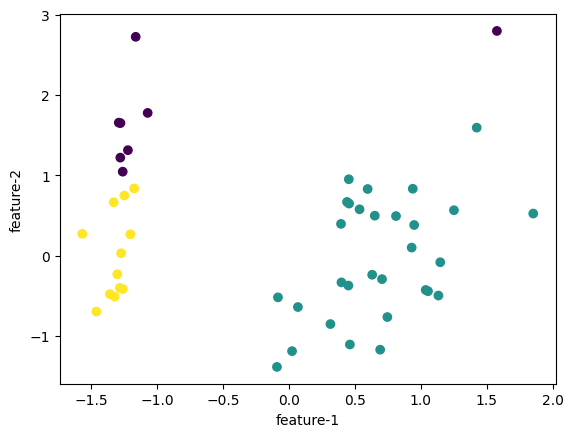

In [10]:
plt.scatter(X_test[:,0] , X_test[:,1],c=y_test_labels)
plt.xlabel("feature-1")
plt.ylabel("feature-2")

In [11]:
# Checking accuracy of model
from sklearn.metrics import silhouette_score
print(silhouette_score(X_test,y_test_labels))

0.4854803429634915


>Key-Takeaways
>
> - Strengths: Fast, scalable, works for spherical clusters.
>
> - Weaknesses: Needs predefined k, sensitive to initialization.
>
> - Use Case: Large datasets, well-separated spherical clusters.

# *Agglomerative Hierarchical*

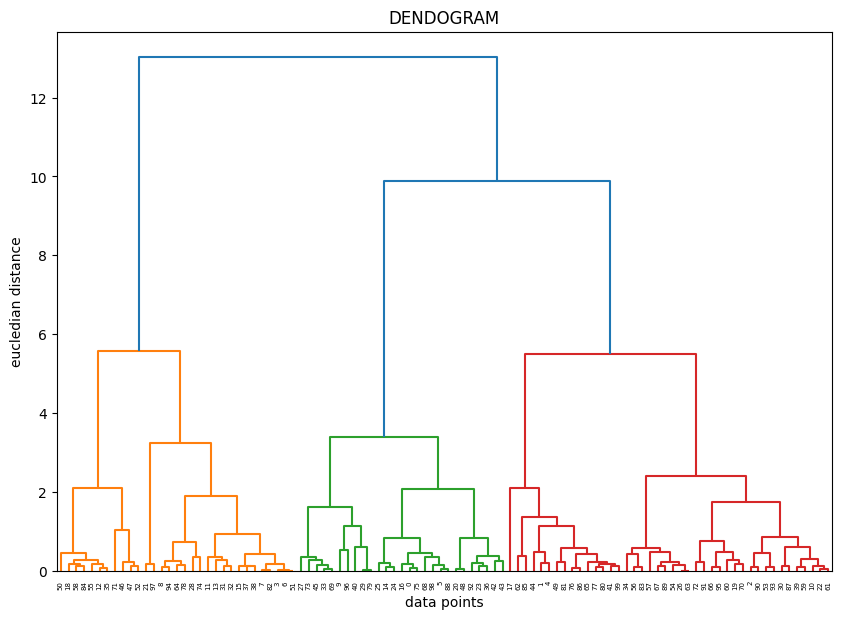

In [12]:
# Plloting dendogram for Hierarchial Clustring
plt.figure(figsize=(10,7))
import scipy.cluster.hierarchy as sc
sc.dendrogram(sc.linkage(X_train,method='ward'))
plt.title('DENDOGRAM')
plt.xlabel('data points')
plt.ylabel('eucledian distance')
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering
# From dendogram we can see the optimum number of clusters is 2
clusters = AgglomerativeClustering(n_clusters=2, metric='euclidean' , linkage='ward')
clusters.fit(X_train)
y_test_hierarchial = clusters.fit_predict(X_test)


In [14]:
clusters.labels_

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0])

Text(0, 0.5, 'feature-2')

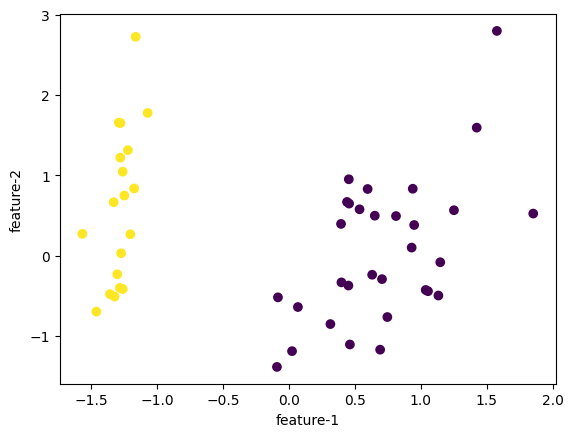

In [15]:
plt.scatter(X_test[:,0],X_test[:,1] , c=y_test_hierarchial)
plt.xlabel("feature-1")
plt.ylabel("feature-2")

In [16]:
print(silhouette_score(X_test,y_test_hierarchial))

0.5127278972462296


>Key-Takeaways
>
> - Strengths: Dendrogram visualization, no need for k, captures hierarchies.
>
> - Weaknesses: Slow for large datasets, sensitive to noise.
>
> - Use Case: Small datasets, hierarchical relationships.

# *DB-SCAN*

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
dbcan = DBSCAN(eps=0.5 , min_samples=5)
# dbcan.fit(X)

y_test_dbscan = dbcan.fit_predict(X)
dbcan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [19]:
X

array([[-1.30971087,  0.65054141],
       [-1.32435711, -0.36051227],
       [-1.40967409, -0.29522986],
       [-1.33958163, -0.64830449],
       [-1.33146886,  0.66552653],
       [-1.11293846,  1.50992585],
       [-1.37627274, -0.18221302],
       [-1.28141939,  0.33277896],
       [-1.4084016 , -1.17789289],
       [-1.30416299, -0.23173293],
       [-1.22325714,  1.3138624 ],
       [-1.2748859 ,  0.03000162],
       [-1.35947347, -0.47887104],
       [-1.57304515, -1.04159745],
       [-1.29049784,  2.40088235],
       [-1.16426043,  2.72533645],
       [-1.28014238,  1.65117453],
       [-1.29222826,  0.6351676 ],
       [-1.07339558,  1.7777797 ],
       [-1.26280003,  1.04600854],
       [-1.12728243,  0.79708495],
       [-1.24119316,  0.88191703],
       [-1.56920777,  0.27184488],
       [-1.12361159,  0.20104806],
       [-1.14948296, -0.07593489],
       [-1.2231214 , -0.29740403],
       [-1.20465318,  0.26671917],
       [-1.25027614,  0.74896183],
       [-1.28795287,

Text(0, 0.5, 'feature-2')

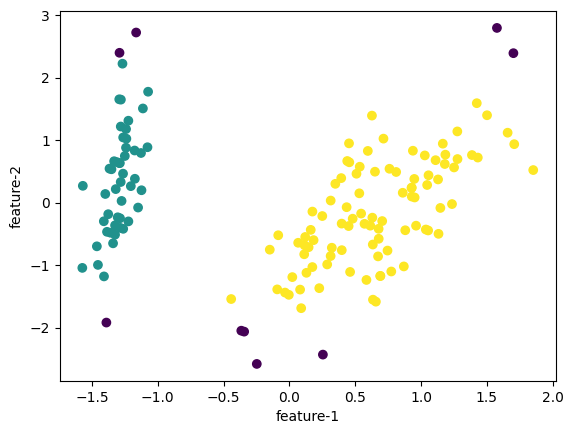

In [20]:
plt.scatter(X[:,0],X[:,1],c=dbcan.labels_)
plt.xlabel("feature-1")
plt.ylabel("feature-2")

>Key-Takeaways
>
>- Strengths: Fast, scalable, works for spherical clusters.
>
>- Weaknesses: Needs predefined k, sensitive to initialization.
>
>- Use Case: Large datasets, well-separated spherical clusters.